### Stochastic processes

Mathematical objects describing an evolution of random variable(s) in time.

$$\left\{X_{t}\right\}_{t \in T}$$


#### Markov processes and Markov property

Markov property (memorylessness): probability distribution over $X_{t+1}$ depends only on $X_t$, but not on any previous values of the process

* Markov process: stochastic process which has Markov property
* Finite Markov chains are special case of Markov process

#### Finite Markov chains 

* $X_t$ - takes values from finite set $S = \left\{x_1, \ldots, x_n\right\}$ which is called state space
* time is discrete
* probability transition from $x_i \in S$ to $x_j \in S$ denoted $P_{ij}$ only depends on $x_i$ and not on any previous values of $X_t$

$$
\mathbb{P}\left(X_{t+1} \mid X_{t}, X_{t-1}, \ldots\right)=\mathbb{P}\left(X_{t+1}=x_{j} \mid X_{t}=x_{i}\right)=P_{i j}
$$

#### Markov matrix
* all elements are nonnegative
* each rows sums to one

#### Finite Markov chain:

* A sequence of random variable on $S$ that have Markov property
* Fully characterized by its transition probability matrix

### Simulation of Markov chain

By definition $\left\{P_{i k}\right\}, k=1, \ldots, n$ is probability distribution of $X_{t+1}$ given $X_t = x_i$

Therefore, it is possible to simulate the chain with

1. Draw $X_0$ from the initial distributiob $\psi$
2. At every step, given current $X_t = x_i$ draw $X_t+1$ from discrete distribution $\left\{P_{i k}\right\}, k=1, \ldots, n$

In [2]:
import numpy as np
P = np.array([[.5, .4, .1], [.4, .5, .1], [.2, .2, .6]])
ψ = np.array([0.2, 0.3, 0.5]) #arbitrary distribution of initial value

In [3]:
def ddraw(probs):
    '''
    Draws one realization of discrete random variables
    generated from given probability distribution (base 0)
    '''
    probs = np.asarray(probs)
    
    assert probs.ndim == 1, 'Expecting a one-dimensial array of probabilities'
    assert np.abs(probs.sum() - 1) < 1e-10, 'Passed probabilities do not sum up to one'
    
    cdf = np.cumsum(probs) # cum distibution
    u = np.random.uniform()
    for i in range(cdf.size):
        if u <= cdf[i]:
            return i

0-2
1-2
2-2
3-2
4-0
5-2
6-1
7-2
8-1
9-2
10-1


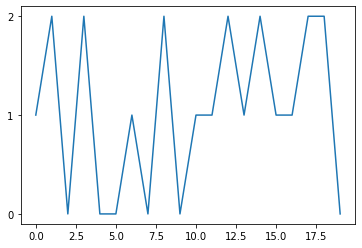

In [5]:
import matplotlib.pyplot as plt
n = 20
l = [0] * n
for j in range(n):
    l[j] = ddraw(ψ)
    if j <= 10:
        print(j, ddraw(ψ),sep='-')
    if j == (n-1):
        plt.plot(np.arange(0, n), l)
        plt.yticks([0, 1, 2])

In [6]:
def simmc(P, psi, T=100):
    '''
    Simulates Markov chain with given transition probability matrix(P),
    initial state distribution (ψ) for a given number T of steps (time periods)
    '''
    P = np.asarray(P)
    psi = np.asarray(psi)
    assert np.all(np.abs(P.sum(axis=1) - 1) < 1e-10)
    m = psi.size # number of states in the chain 
    # simulate the initial state
    X = np.empty(T, dtype=int)
    X[0] = ddraw(psi) #inital values in first column
    # main loop over time
    for t in range(1, T):
        X[t] = ddraw(P[int(X[t-1]), :]) # simulate using approriate row
    return X

In [7]:
print('Transition matrix: ', P, sep='\n')
print('Distibution of initial value:', ψ, sep='\n')

sm = simmc(P, ψ, T=9)
print('Simulation:', sm, sep='\n')

weather = ['Sunny', 'Partly cloudy', 'Rainy']
for i in sm:
    print(weather[i], end='-->')
print('end')

Transition matrix: 
[[0.5 0.4 0.1]
 [0.4 0.5 0.1]
 [0.2 0.2 0.6]]
Distibution of initial value:
[0.2 0.3 0.5]
Simulation:
[1 1 0 2 2 2 1 1 0]
Partly cloudy-->Partly cloudy-->Sunny-->Rainy-->Rainy-->Rainy-->Partly cloudy-->Partly cloudy-->Sunny-->end


#### Marginal distibution 
Suppose that
1. $\left\{X_t\right\}$ is a Markov chain with stochastic matrix $P$

2. the distibution of X_t is known to be $\psi_t$

What then is the distibutiob of $X_{t+1}$, and, more generally, of $X_{t+m}$

Fix $y \in S$. Using the law of total probability, we can decompose the probability that $\mathbb{P}\left\{X_{t+1}=y\right\}$ as follows:

$$
\mathbb{P}\left\{X_{t+1}=y\right\}=\sum_{x \in S} \mathbb{P}\left\{X_{t+1}=y \mid X_{t}=x\right\} \cdot \mathbb{P}\left\{X_{t}=x\right\}
$$

In words, to get the probability of being at $y$ tomorrow, we account for all ways this can happen and sum their probabilities

In [12]:
ψ @ np.linalg.matrix_power(P, 10)

array([0.39985352, 0.39985352, 0.20029297])

In [66]:
import numpy as np
import matplotlib.pyplot as plt
def Wiener(maxiter=100,plot=True,replay=1,zoom=True):
    if zoom:
        plt.figure(figsize=(10, 10))
    for i in range(replay):
        Wiener_list = [0] * (maxiter+1)
        for j in range(1,(maxiter+1)):
            Wiener_list[j] = Wiener_list[j-1] + np.random.normal()
        if plot:
            plt.plot(np.arange(0, len(Wiener_list)), Wiener_list, label=i+1)
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.title('Wiener process')
        else:
            return Wiener_list

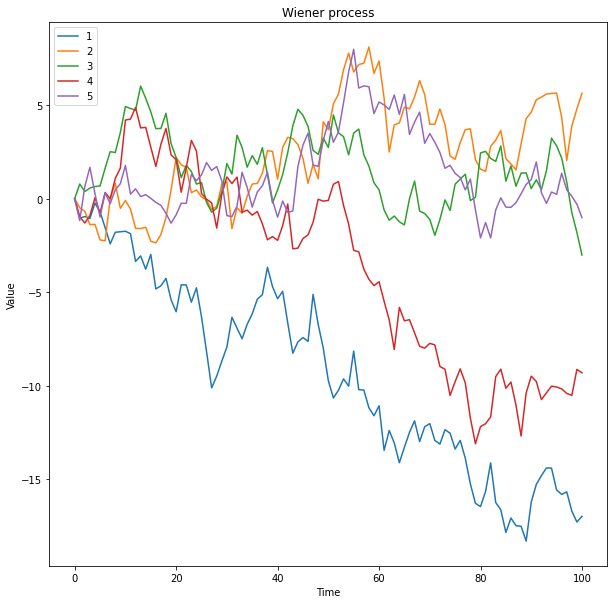

In [70]:
Wiener(100, True, 5, zoom=True)

SyntaxError: invalid syntax (Temp/ipykernel_9812/311900943.py, line 1)